In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

## Descriptive statistics


In [117]:
stats.norm.cdf(70,loc=60,scale=10) #area under the curve (loc=mean,scale=std deviationstats)

0.8413447460685429

In [118]:
a=stats.norm.cdf(680,loc=711,scale=29)

In [119]:
1 - stats.norm.cdf(720,loc=711,scale=29) 

0.37814937265194704

In [120]:
b=stats.norm.cdf(740,loc=711,scale=29)

In [121]:
b-a

0.6988021422297268

In [122]:
glaxo = pd.read_csv("PATH/glaxo_df.csv")

In [123]:
beml = pd.read_csv("PATH/beml_df.csv")

In [124]:
glaxo.columns

Index(['Date', 'Date.1', 'Close', 'gain'], dtype='object')

In [125]:
glaxo = glaxo[["Date","Close"]]

In [126]:
beml = beml[["Date","Close"]]

In [127]:
glaxo=glaxo.set_index(pd.DatetimeIndex(glaxo["Date"]))

In [128]:
beml=beml.set_index(pd.DatetimeIndex(beml["Date"]))

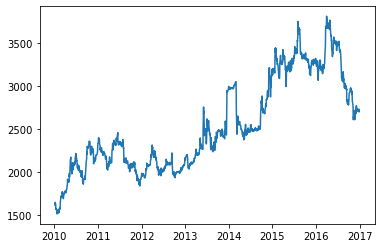

In [129]:
plt.plot(glaxo.Close)

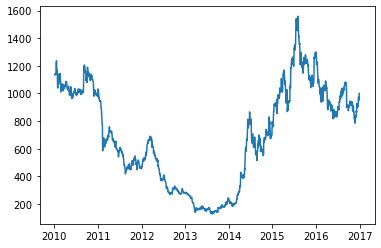

In [130]:
plt.plot(beml.Close)

In [131]:
glaxo["gain"] = glaxo.Close.pct_change(periods=1)


In [132]:
beml["gain"] = beml.Close.pct_change(periods=1)

In [133]:
beml = beml.dropna()


In [134]:
glaxo = glaxo.dropna()

In [135]:
beml

,Date,Close,gain
Date,,,
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
2010-01-12,2010-01-12,1143.65,0.005849
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


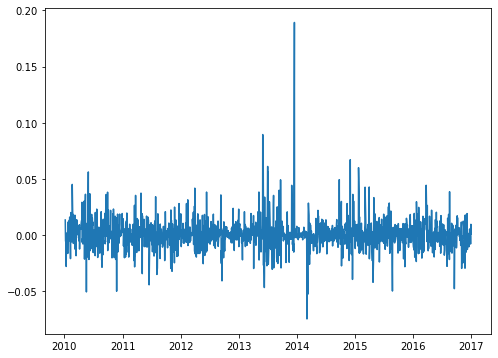

In [136]:
plt.figure(figsize=(8,6))
plt.plot(glaxo.index,glaxo.gain)

<AxesSubplot:xlabel='gain', ylabel='Density'>

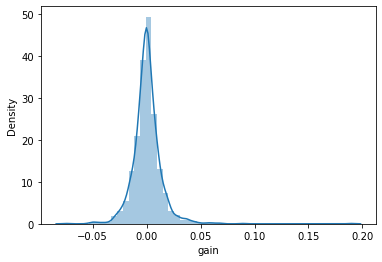

In [137]:
sns.distplot(glaxo.gain,label="glaxo")

<AxesSubplot:xlabel='gain', ylabel='Density'>

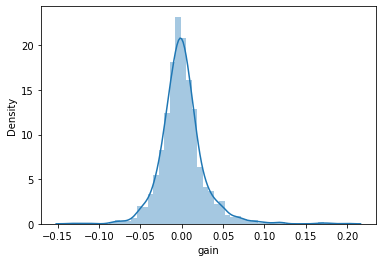

In [138]:
sns.distplot(beml.gain,label="beml")

In [139]:
mean_glaxo = glaxo["gain"].agg("mean")
mean_glaxo

0.00038939745411689956

In [140]:
print("mean:",round(glaxo.gain.mean(),4))
print("std_dev:",round(glaxo.gain.std(),4))

mean: 0.0004
std_dev: 0.0134


In [141]:
print("mean:",round(beml.gain.mean(),4))
print("std_dev:",round(beml.gain.std(),4))

mean: 0.0003
std_dev: 0.0264


In [142]:
stats.norm.cdf(-0.02,loc=glaxo.gain.mean(),scale=glaxo.gain.std())

0.06353789851454293

In [143]:
stats.norm.cdf(-0.02,loc=beml.gain.mean(),scale=beml.gain.std())

0.2216179428118762

In [144]:
1-stats.norm.cdf(0.02,loc=glaxo.gain.mean(),scale=beml.gain.std())

0.22912057634024974

In [145]:
1-stats.norm.cdf(0.02,loc=beml.gain.mean(),scale=beml.gain.std())

0.2277706340605088

## Inferential statistics

In [146]:
glaxo_ci = stats.norm.interval(0.95,loc=glaxo.gain.mean(),scale=glaxo.gain.std())

In [147]:
glaxo_ci

(-0.025802881386890904, 0.026581676295124704)

In [148]:
beml_ci = stats.norm.interval(0.95,loc=beml.gain.mean(),scale=beml.gain.std())

In [149]:
beml_ci

(-0.05154695673690861, 0.05208977855977462)

In [150]:
#for getting z(1-aplha) value
stats.norm.ppf(0.975)

1.959963984540054

In [151]:
#for getting t(1-aplha)(n-1) value
stats.t.ppf(0.975,df=139)

1.977177724476122